In [38]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#pip install kaggle to upload files directly from kaggle to colab
!pip install kaggle

In [ ]:
#command to upload kaggle.json file which is api token
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [14]:
#command to download the datasets form kaggle
!kaggle datasets download -d govindaramsriram/energy-consumption-dataset-linear-regression

Dataset URL: https://www.kaggle.com/datasets/govindaramsriram/energy-consumption-dataset-linear-regression
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/16.3k [00:00<?, ?B/s]
100% 16.3k/16.3k [00:00<00:00, 62.9MB/s]


In [15]:
#unzip the downloaded file
!unzip energy-consumption-dataset-linear-regression.zip

Archive:  energy-consumption-dataset-linear-regression.zip
  inflating: test_energy_data.csv    
  inflating: train_energy_data.csv   


In [19]:
#read both file using pandas
test_data = pd.read_csv('test_energy_data.csv')
train_data = pd.read_csv('train_energy_data.csv')

In [20]:
#EDA of test_data
test_data

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [24]:
test_data.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


In [25]:
test_data.isnull().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


In [26]:
test_data.duplicated().sum()

np.int64(0)

In [27]:
#EDA of train_data
train_data

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [29]:
train_data.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


In [30]:
train_data.duplicated().sum()

np.int64(0)

In [31]:
#data preprocessing
#one hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=['Building Type', 'Day of Week'], drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=['Building Type', 'Day of Week'], drop_first=True)

display(train_data_encoded)
display(test_data_encoded)

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,7063,76,10,29.84,2713.95,False,True,False
1,44372,66,45,16.72,5744.99,False,False,False
2,19255,37,17,14.30,4101.24,True,False,True
3,13265,14,41,32.82,3009.14,False,True,False
4,13375,26,18,11.92,3279.17,False,False,False
...,...,...,...,...,...,...,...,...
995,14419,68,44,23.95,3661.21,False,True,True
996,12194,7,22,14.67,3546.34,True,False,True
997,39562,88,20,32.18,5147.21,False,False,False
998,8348,67,37,16.48,3244.98,False,True,True


,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,24563,15,4,28.52,2865.57,False,True,False
1,27583,56,23,23.07,4283.80,False,False,True
2,45313,4,44,33.56,5067.83,False,False,False
3,41625,84,17,27.39,4624.30,False,True,True
4,36720,58,47,17.08,4820.59,False,True,False
...,...,...,...,...,...,...,...,...
95,1161,81,11,15.45,3010.81,False,False,True
96,37943,50,23,21.73,4248.49,False,True,True
97,1558,27,29,16.86,2843.60,False,False,True
98,2145,56,12,11.77,3348.39,True,False,True


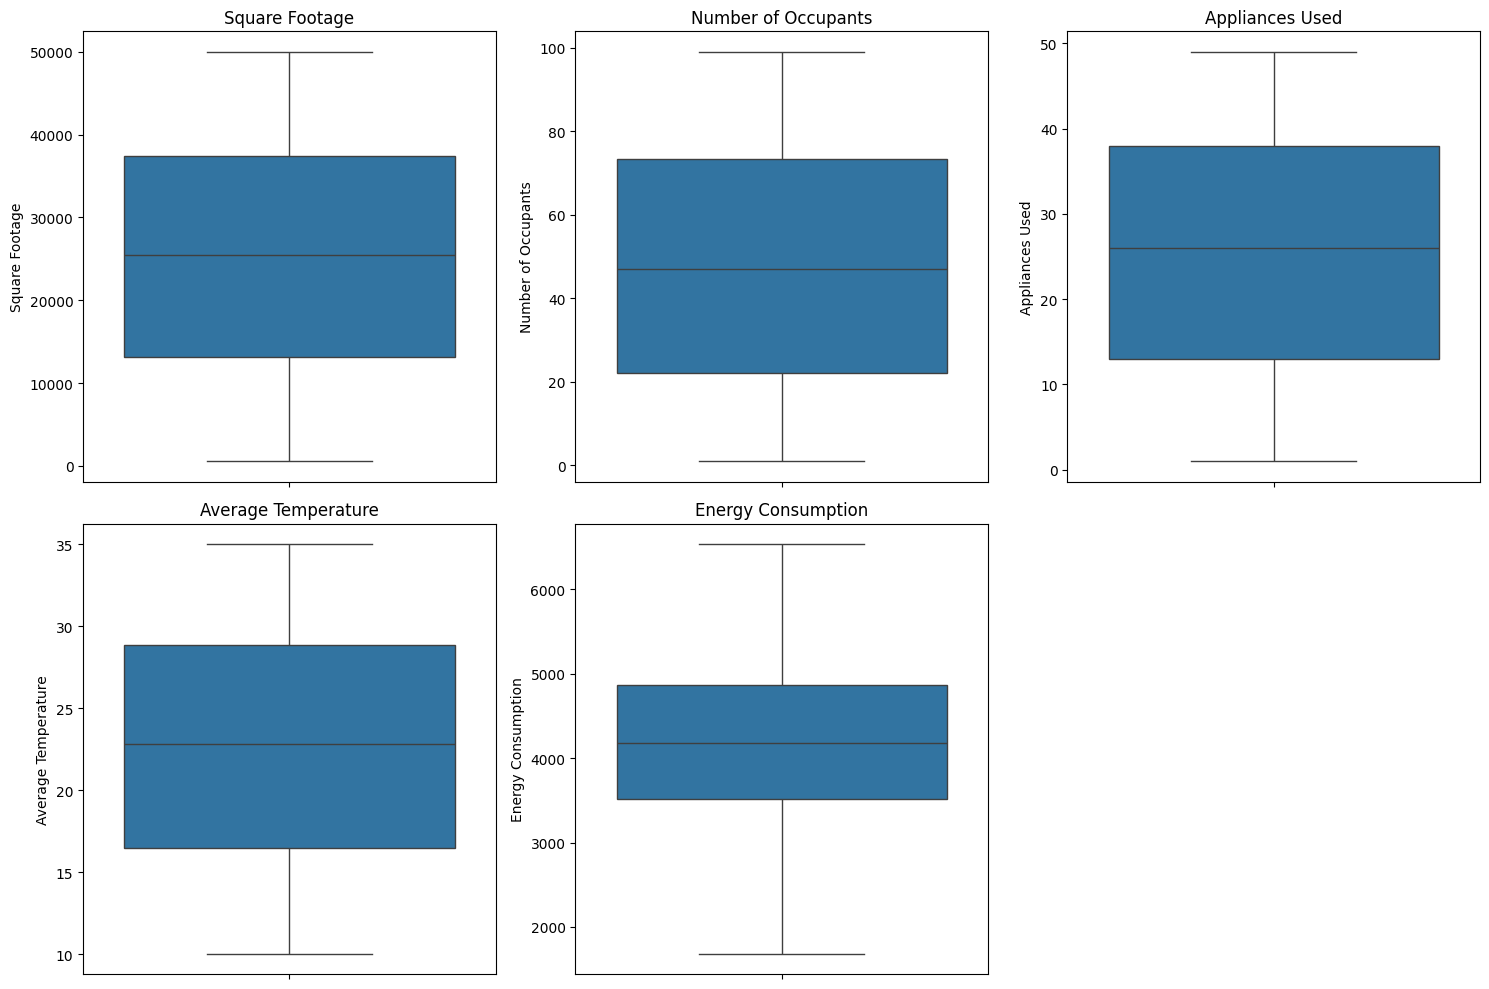

In [32]:
#identifying and handling outliers
#select only numerical columns from the encoded training data
numerical_cols = train_data_encoded.select_dtypes(include=np.number).columns

#create box plots for each numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=train_data_encoded[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [33]:
#reconfirming again for outliers
# Calculate Q1, Q3, and IQR for 'Energy Consumption'
Q1 = train_data_encoded['Energy Consumption'].quantile(0.25)
Q3 = train_data_encoded['Energy Consumption'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Find data points above the upper bound
outliers = train_data_encoded[train_data_encoded['Energy Consumption'] > upper_bound]

print(f"Q1 for Energy Consumption: {Q1}")
print(f"Q3 for Energy Consumption: {Q3}")
print(f"IQR for Energy Consumption: {IQR}")
print(f"Upper bound for outliers: {upper_bound}")

print("\nPotential outliers in 'Energy Consumption' based on IQR:")
display(outliers)

Q1 for Energy Consumption: 3509.4825
Q3 for Energy Consumption: 4863.85
IQR for Energy Consumption: 1354.3675000000003
Upper bound for outliers: 6895.401250000001

Potential outliers in 'Energy Consumption' based on IQR:


,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend


In [35]:
#define the target variable (y)
y = train_data_encoded['Energy Consumption']

#define the features (X) by dropping the target variable column
X = train_data_encoded.drop('Energy Consumption', axis=1)

#display the first few rows of the features and target
print("Features (X): ")
display(X.head())

print("\nTarget (y): ")
display(y.head())

Features (X): 


,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,7063,76,10,29.84,False,True,False
1,44372,66,45,16.72,False,False,False
2,19255,37,17,14.30,True,False,True
3,13265,14,41,32.82,False,True,False
4,13375,26,18,11.92,False,False,False



Target (y): 


,Energy Consumption
0,2713.95
1,5744.99
2,4101.24
3,3009.14
4,3279.17


In [37]:
#Model Training
#initialize the linear regression model
model = LinearRegression()

#train the model using the training data
model.fit(X, y)

print("Linear Regression model trained successfully!!")

Linear Regression model trained successfully!!


In [39]:
#define features (X_test) and target (y_test) for the test data
X_test = test_data_encoded.drop('Energy Consumption', axis=1)
y_test = test_data_encoded['Energy Consumption']

#Make predictions on the test data
y_pred = model.predict(X_test)

#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#Print all the score
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.01
R-squared (R2): 1.00
